In [ ]:
!pip install praw
!pip install pmaw
!pip install markdown
!pip install voussoirkit
!pip install tqdm
!pip install NRCLex
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nrclex import NRCLex
import praw
import markdown
import voussoirkit
import pandas as pd
import matplotlib.pyplot as plt
import csv
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim import corpora, models
from pprint import pprint

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
reddit = praw.Reddit(user_agent= True, client_id= '#########',
                    client_secret='##########',
                    username='#######', password='########')

subreddit = reddit.subreddit("endometriosis")

count = 0
with open('endometriosis_posts.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Title', 'Score', 'ID', 'SelfText'])

    for submission in subreddit.hot(limit=10000):
        count += 1
        writer.writerow([submission.title, submission.score, submission.id, submission.selftext])

print(count)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

998


In [ ]:
import pandas as pd
df= pd.read_csv("/content/endometriosis_posts.csv")
df = df.sort_values(by=['Score'], ascending=False)
df

,Title,Score,ID,SelfText
272,I am MORTIFIED right now..,209,18ve86p,I was quietly watching my favourite TV show an...
846,"My dentist says, endo shows on my gums",201,18hfbeb,"For many years, I experienced toothaches durin..."
0,Links to endometriosis information and research,161,bgf7so,Below is a selection of links to useful inform...
483,Everyone bleeding/in pain this holiday… I see ...,159,18q6zc6,Period. Everyone talks about holiday stress du...
698,I hate when people who don’t have my condition...,153,18kmd2q,Because it’s usually followed by some variatio...
...,...,...,...,...
32,Hi has anyone tried raspberry tea or St John b...,0,191fwpp,.
256,Is getting diagnosed worth it?,0,18wsev0,Is getting diagnosed with endo or another diso...
24,Scared,0,191lxxr,"I don’t want to be asleep for the surgery, is ..."
963,Could I have it??,0,18g2htp,My husband and I have been TTC for a little ov...


**PRE-PROCESSING: REMOVAL OF STOP WORDS, PUNCTUATION, LOWERCASE ETC.**

In [ ]:
df['SelfText'][837]

'For many years, I experienced toothaches during my period. I always thought it was just the intense pain in my uterus that made everything feel tense and painful. At the dentist’s appointment earlier today, I was told that infection-prone, inflamed, and bleeding gums are often correlated with endometriosis and asked if I have it. I have a ‘suspected endo’ diagnosis and have been undergoing various hormonal remedies for the past few years. I just think this is wild. That’s it. Have a lovely day!'

In [ ]:

# Define the preprocessing function
def preprocess_text(text):
    # Lowercase the text
    lowered_text = text.lower()

    # Remove punctuation
    no_punctuation = re.sub(r'[^\w\s]', '', lowered_text)

    # Remove special characters
    no_special_characters = re.sub(r'[^\x00-\x7F]+', '', no_punctuation)

    # Remove URLs and non-English characters
    no_urls_non_english = re.sub(r'http\S+|www\S+|https\S+', '', no_special_characters)
    no_urls_non_english = re.sub(r'[^\x00-\x7F\x41-\x5A\x61-\x7A\s]', '', no_urls_non_english)

    # Remove stop words
    stop_words = nltk.corpus.stopwords.words('english')
    newStopWords = ['im', 'i ve', 'ive']
    stop_words.extend(newStopWords)
    tokens = nltk.word_tokenize(no_urls_non_english)
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the lemmatized tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text


In [ ]:
df['Title']= df['Title'].apply(preprocess_text)
df['SelfText']= df['SelfText'].astype('str')
df['SelfText']= df['SelfText'].apply(preprocess_text)

## **EMOTION CLASSIFICATION**

In [ ]:
def analyze_emotion(text):
    lexicon = NRCLex(text)
    emotions = lexicon.affect_frequencies
    dominant_emotion = max(emotions, key=emotions.get)
    return dominant_emotion

In [ ]:
df['emotion']= df['SelfText'].apply(analyze_emotion)

In [ ]:
df['emotion'].value_counts()

negative        458
fear            213
positive        195
trust            66
sadness          30
anticipation     29
anger             3
surprise          2
disgust           1
joy               1
Name: emotion, dtype: int64

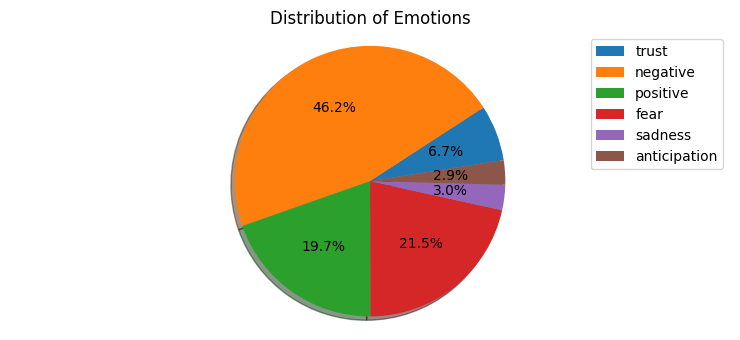

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
unique_emotions = df['emotion'].unique()


emotion_counts = {}
for emotion in unique_emotions:
    emotion_counts[emotion] = len(df[df['emotion'] == emotion])

# Create a dictionary to store the emotion counts
high_count_emotions = [emotion for emotion in unique_emotions if emotion_counts[emotion] >= (0.01 * len(df))]
high_count_emotion_counts = {emotion: emotion_counts[emotion] for emotion in high_count_emotions}

# Create a pie chart with filtered emotions
patches= plt.pie(high_count_emotion_counts.values(),shadow=True, startangle=9 ,  autopct="%1.1f%%")
plt.legend(high_count_emotion_counts.keys(), loc="best")
plt.axis('equal')
plt.title('Distribution of Emotions')
plt.show()

## **WORD CLOUD**

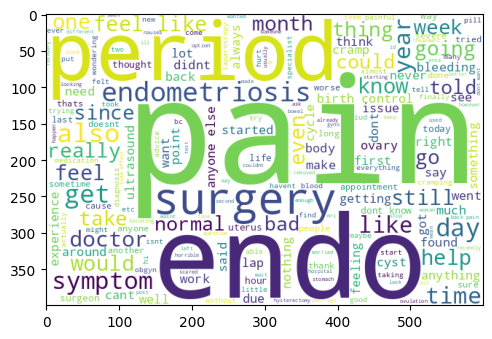

In [ ]:

from wordcloud import WordCloud
from nltk.corpus import stopwords
# Create a list of all words in the SelfText column
all_words = []
for text in df['SelfText']:
    all_words.extend(text.split())
all_words_string = ' '.join(all_words)
# Create a WordCloud object
stopwords = set(stopwords.words('english'))
new_stopwords = ['im', 'i ve', 'ive']
stopwords.update(new_stopwords)
new_stopword = set(stopwords)
wordcloud = WordCloud(width=600, height=400, background_color='white', stopwords=new_stopword )

# Generate a word cloud
wc=wordcloud.generate(all_words_string)
plt.imshow(wc)

## **LDA FOR TOPIC MODELLING**

In [ ]:
!pip install pyldavis==3.4.1
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

import pickle
import pyLDAvis
import pyLDAvis.gensim



  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.18.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.1.4 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.4 which is incompatible.


In [ ]:

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.071001  0.050621       1        1  27.812614
2      0.032008 -0.008094       2        1  25.254134
4     -0.008086  0.048609       3        1  18.949104
0     -0.042683 -0.093826       4        1  16.691230
1      0.089762  0.002690       5        1  11.292918, topic_info=        Term        Freq       Total Category  logprob  loglift
70   surgery  666.000000  666.000000  Default  30.0000  30.0000
7       endo  748.000000  748.000000  Default  29.0000  29.0000
22    period  914.000000  914.000000  Default  28.0000  28.0000
543   anyone  398.000000  398.000000  Default  27.0000  27.0000
318    ovary  265.000000  265.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
109     help   41.693338  307.620306   Topic5  -5.3225   0.1825
30      told   39.223046  251.676088   Topic5  -5.3836   0.3221
228     like   47.019929  784.025302   Topic5  -5.2023  -0.6329
64    really   41.225297  346.584849   Topic5  -5.3338   0.0519
294      got   39.321223  288.846557   Topic5  -5.3811   0.1869

[414 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1763      2  0.887737   11th
1230      3  0.844771     19
1230      4  0.105596     19
756       1  0.423649      2
756       2  0.147162      2
...     ...       ...    ...
33        2  0.245771   year
33        3  0.219555   year
33        4  0.170401   year
33        5  0.158932   year
856       2  0.920870  youll

[968 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 1, 2])

In [ ]:
!pip install pandas==1.5.3
pd.__version__

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


'1.5.3'

In [ ]:
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pd.__version__

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'1.5.3'

In [ ]:
# DataFrame containing the preprocessed and tokenized text
negative_posts = df[df['emotion'] == 'negative']['SelfText'].apply(lambda x: x.split()).tolist()

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(negative_posts)

# Filter out extreme values in the dictionary
dictionary.filter_extremes(no_below=5, no_above=0.8)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(post) for post in negative_posts]

# Build the LDA model
neg_lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Print the topics and associated words
pprint(neg_lda_model.print_topics())

topic_distribution = [max(neg_lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
print(topic_distribution.count)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.013*"endometriosis" + 0.013*"pain" + 0.011*"surgery" + 0.011*"get" + '
  '0.009*"endo" + 0.008*"like" + 0.007*"day" + 0.007*"time" + 0.007*"still" + '
  '0.007*"year"'),
 (1,
  '0.027*"pain" + 0.026*"period" + 0.011*"year" + 0.011*"endometriosis" + '
  '0.011*"symptom" + 0.011*"also" + 0.011*"get" + 0.009*"endo" + 0.008*"day" + '
  '0.008*"since"'),
 (2,
  '0.034*"pain" + 0.021*"like" + 0.017*"feel" + 0.010*"day" + 0.010*"symptom" '
  '+ 0.010*"get" + 0.010*"endo" + 0.008*"period" + 0.008*"back" + '
  '0.007*"dont"'),
 (3,
  '0.026*"pain" + 0.020*"feel" + 0.017*"like" + 0.013*"endo" + 0.011*"surgery" '
  '+ 0.008*"day" + 0.006*"ovary" + 0.006*"year" + 0.006*"go" + 0.006*"get"'),
 (4,
  '0.033*"pain" + 0.017*"period" + 0.016*"day" + 0.012*"like" + 0.009*"feel" + '
  '0.009*"bleeding" + 0.009*"month" + 0.008*"year" + 0.008*"back" + '
  '0.007*"endo"')]
<built-in method count of list object at 0x7f662922e700>


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(neg_lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.026545 -0.008951       1        1  30.151559
1     -0.041451 -0.031701       2        1  24.888540
0      0.009183 -0.053208       3        1  22.170361
2     -0.032232  0.077942       4        1  13.239056
3      0.091044  0.015918       5        1   9.550484, topic_info=        Term         Freq        Total Category  logprob  loglift
11      feel   423.000000   423.000000  Default  30.0000  30.0000
19      pain  1176.000000  1176.000000  Default  29.0000  29.0000
99      like   520.000000   520.000000  Default  28.0000  28.0000
22    period   625.000000   625.000000  Default  27.0000  27.0000
67   surgery   273.000000   273.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
22    period    23.271912   625.652578   Topic5  -5.2113  -0.9430
85      even    18.865279   235.121438   Topic5  -5.4212  -0.1742
54      know    19.021411   261.634234   Topic5  -5.4130  -0.2728
346    still    17.955129   196.922062   Topic5  -5.4706  -0.0464
38      dont    18.045537   278.090646   Topic5  -5.4656  -0.3865

[403 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
820       1  0.128011   100
820       2  0.768065   100
1307      3  0.863791  11th
410       1  0.215957    15
410       2  0.647870    15
...     ...       ...   ...
32        1  0.302806  year
32        2  0.349182  year
32        3  0.185503  year
32        4  0.090024  year
32        5  0.073656  year

[954 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 3, 4])

In [ ]:
# DataFrame containing the preprocessed and tokenized text
fear_posts = df[df['emotion'] == 'fear']['SelfText'].apply(lambda x: x.split()).tolist()

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(fear_posts)

# Filter out extreme values in the dictionary
dictionary.filter_extremes(no_below=5, no_above=0.8)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(post) for post in fear_posts]

# Build the LDA model
fear_lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Print the topics and associated words
pprint(fear_lda_model.print_topics())

topic_distribution = [max(fear_lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
print(topic_distribution.count)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.034*"pain" + 0.021*"period" + 0.020*"month" + 0.019*"endometriosis" + '
  '0.018*"day" + 0.018*"surgery" + 0.013*"2" + 0.011*"due" + 0.011*"stage" + '
  '0.011*"got"'),
 (1,
  '0.034*"pain" + 0.021*"period" + 0.017*"control" + 0.016*"birth" + '
  '0.016*"get" + 0.015*"surgery" + 0.014*"cyst" + 0.013*"dont" + 0.013*"year" '
  '+ 0.013*"day"'),
 (2,
  '0.044*"surgery" + 0.021*"week" + 0.019*"pain" + 0.016*"endo" + '
  '0.014*"anyone" + 0.011*"surgeon" + 0.011*"year" + 0.011*"lap" + '
  '0.011*"said" + 0.010*"bleeding"'),
 (3,
  '0.033*"surgery" + 0.026*"pain" + 0.026*"endo" + 0.012*"anyone" + '
  '0.012*"much" + 0.010*"uterus" + 0.010*"back" + 0.010*"ovary" + 0.009*"get" '
  '+ 0.009*"experience"'),
 (4,
  '0.036*"surgery" + 0.015*"like" + 0.014*"year" + 0.014*"pain" + 0.013*"feel" '
  '+ 0.011*"know" + 0.011*"laparoscopy" + 0.011*"want" + 0.011*"also" + '
  '0.011*"bad"')]
<built-in method count of list object at 0x79c14b9acec0>


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(fear_lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.013422 -0.022457       1        1  40.854029
3      0.020926 -0.020551       2        1  24.068107
4      0.018365 -0.078767       3        1  17.238737
0     -0.118285  0.045936       4        1   8.924114
2      0.092416  0.075839       5        1   8.915014, topic_info=           Term        Freq       Total Category  logprob  loglift
76      surgery  223.000000  223.000000  Default  30.0000  30.0000
176      period  110.000000  110.000000  Default  29.0000  29.0000
33         pain  235.000000  235.000000  Default  28.0000  28.0000
113         day   76.000000   76.000000  Default  27.0000  27.0000
51         week   65.000000   65.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
234   wondering    5.121092   24.304409   Topic5  -5.0207   0.8601
117      doctor    5.870487   58.024669   Topic5  -4.8842   0.1265
101  ultrasound    5.325804   38.515293   Topic5  -4.9815   0.4389
100         two    5.053432   30.710242   Topic5  -5.0340   0.6129
236        cyst    5.454008   68.548294   Topic5  -4.9578  -0.1138

[329 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
445       1  0.251396          1
445       2  0.167598          1
445       3  0.083799          1
445       4  0.418994          1
445       5  0.083799          1
...     ...       ...        ...
102       3  0.093034  yesterday
102       5  0.651236  yesterday
299       1  0.763326        yet
299       3  0.138787        yet
299       4  0.069393        yet

[748 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 1, 3])

In [ ]:
# DataFrame containing the preprocessed and tokenized text
a_posts = df[df['emotion'] == 'anticipation']['SelfText'].apply(lambda x: x.split()).tolist()

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(a_posts)

# Filter out extreme values in the dictionary
dictionary.filter_extremes(no_below=5, no_above=0.8)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(post) for post in a_posts]

# Build the LDA model
a_lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Print the topics and associated words
pprint(a_lda_model.print_topics())

topic_distribution = [max(a_lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
print(topic_distribution.count)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.056*"happen" + 0.049*"pain" + 0.047*"could" + 0.046*"time" + 0.046*"endo" '
  '+ 0.043*"got" + 0.043*"experience" + 0.043*"hi" + 0.043*"finally" + '
  '0.043*"endometriosis"'),
 (1,
  '0.071*"period" + 0.070*"get" + 0.058*"last" + 0.055*"week" + 0.054*"time" + '
  '0.039*"anyone" + 0.038*"endo" + 0.038*"thought" + 0.037*"year" + '
  '0.034*"start"'),
 (2,
  '0.071*"time" + 0.069*"anyone" + 0.063*"period" + 0.060*"else" + '
  '0.056*"experience" + 0.048*"even" + 0.048*"want" + 0.042*"get" + '
  '0.040*"month" + 0.038*"long"'),
 (3,
  '0.088*"ovary" + 0.078*"time" + 0.075*"like" + 0.045*"uterus" + '
  '0.044*"surgery" + 0.043*"pain" + 0.042*"back" + 0.042*"week" + 0.041*"get" '
  '+ 0.034*"long"'),
 (4,
  '0.076*"month" + 0.071*"day" + 0.052*"start" + 0.045*"week" + 0.038*"get" + '
  '0.038*"trying" + 0.037*"got" + 0.037*"like" + 0.035*"back" + '
  '0.034*"period"')]
<built-in method count of list object at 0x7f6639a5ad80>


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(a_lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.024340 -0.086458       1        1  30.905413
1      0.064178 -0.037962       2        1  22.868457
3     -0.097954  0.100141       3        1  20.998682
2      0.126437  0.060588       4        1  15.860740
0     -0.068321 -0.036309       5        1   9.366708, topic_info=       Term       Freq      Total Category  logprob  loglift
34    ovary  11.000000  11.000000  Default  30.0000  30.0000
2       day  13.000000  13.000000  Default  29.0000  29.0000
33     like  13.000000  13.000000  Default  28.0000  28.0000
17     last   8.000000   8.000000  Default  27.0000  27.0000
36     time  22.000000  22.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
20     week   1.057879  19.901571   Topic5  -3.7474  -0.5665
29    birth   0.176777   5.300269   Topic5  -5.5366  -1.0326
30  control   0.176714   5.300266   Topic5  -5.5369  -1.0330
43   trying   0.178008  10.070113   Topic5  -5.5296  -1.6675
33     like   0.177945  13.558869   Topic5  -5.5300  -1.9653

[191 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
26        1  0.317085     2
26        2  0.158542     2
26        3  0.317085     2
26        5  0.158542     2
48        1  0.158991     3
...     ...       ...   ...
20        5  0.050247  week
44        1  0.301456  year
44        2  0.401941  year
44        3  0.200971  year
44        5  0.100485  year

[168 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 3, 1])

In [ ]:
# DataFrame containing the preprocessed and tokenized text
sad_posts = df[df['emotion'] == 'sadness']['SelfText'].apply(lambda x: x.split()).tolist()

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(sad_posts)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(post) for post in sad_posts]

# Build the LDA model
sad_lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Print the topics and associated words
pprint(sad_lda_model.print_topics())

topic_distribution = [max(sad_lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
print(topic_distribution.count)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.070*"ill" + 0.059*"abdominal" + 0.048*"get" + 0.048*"worried" + '
  '0.035*"muscle" + 0.035*"sore" + 0.031*"else" + 0.030*"anyone" + '
  '0.028*"pain" + 0.026*"go"'),
 (1,
  '0.073*"pain" + 0.039*"go" + 0.039*"time" + 0.033*"started" + 0.033*"since" '
  '+ 0.026*"last" + 0.026*"endometriosis" + 0.026*"lot" + 0.026*"cyst" + '
  '0.026*"side"'),
 (2,
  '0.065*"pain" + 0.061*"day" + 0.046*"like" + 0.046*"still" + 0.046*"endo" + '
  '0.046*"would" + 0.039*"right" + 0.029*"period" + 0.024*"want" + '
  '0.024*"abdomen"'),
 (3,
  '0.062*"pain" + 0.056*"wondering" + 0.038*"today" + 0.038*"endo" + '
  '0.038*"ovary" + 0.038*"right" + 0.026*"yesterday" + 0.026*"around" + '
  '0.026*"tube" + 0.026*"thank"'),
 (4,
  '0.051*"month" + 0.051*"ago" + 0.043*"also" + 0.043*"day" + 0.034*"anyone" + '
  '0.034*"period" + 0.026*"year" + 0.026*"like" + 0.026*"lap" + 0.026*"cant"')]
<built-in method count of list object at 0x7f6639d66400>


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(sad_lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.060942  0.084202       1        1  30.329921
2      0.130084 -0.056779       2        1  24.984650
4     -0.033777 -0.090199       3        1  22.739559
3      0.066376  0.094324       4        1  14.800351
0     -0.101741 -0.031549       5        1   7.145520, topic_info=         Term      Freq     Total Category  logprob  loglift
36        ill  4.000000  4.000000  Default  30.0000  30.0000
32  abdominal  4.000000  4.000000  Default  29.0000  29.0000
70    worried  4.000000  4.000000  Default  28.0000  28.0000
77  wondering  7.000000  7.000000  Default  27.0000  27.0000
6         get  8.000000  8.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
55     period  0.144990  7.672947   Topic5  -5.4215  -1.3301
27       much  0.144585  5.975905   Topic5  -5.4243  -1.0829
24       hour  0.144257  5.120902   Topic5  -5.4265  -0.9308
50       like  0.144224  9.336442   Topic5  -5.4268  -1.5316
12      would  0.144162  6.813983   Topic5  -5.4272  -1.2171

[222 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         2  0.471164         12
0         3  0.471164         12
13        2  0.470970          2
13        3  0.470970          2
61        1  0.466248          3
...     ...       ...        ...
42        1  0.341374       year
42        3  0.512061       year
42        5  0.170687       year
71        1  0.475340  yesterday
71        4  0.475340  yesterday

[232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 4, 1])

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit=50, start=10, step=10):
    coherence_values = []
    model_list = []
    total_amount = limit / step
    current_amount = 0
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus,
                    id2word=dictionary, num_topics=num_topics,
                    random_state=42, update_every=1, chunksize=500,
                    passes=15, alpha='auto', per_word_topics=False)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts,
                    dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        current_amount += 1
        print("Built " + str(current_amount) + " of " +
                    str(total_amount) + " models")
    return model_list, coherence_values

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TOTAL LDA MODEL

In [ ]:
results = []

for t in range(3, 10):
    lda_model = models.LdaModel(corpus, num_topics=t, id2word=dictionary, passes=15, random_state=42)
    corpus_lda = lda_model[corpus]
    cm = CoherenceModel(model=lda_model, texts=texts, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


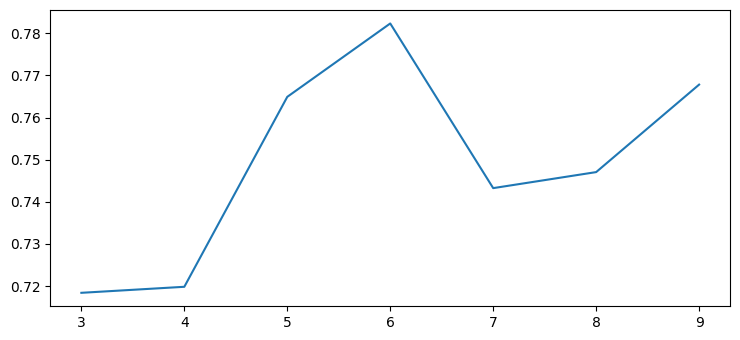

In [ ]:
s = pd.Series(results.score.values, index=results.topic.values)
_ = s.plot()

POS LDA MODEL

In [ ]:

# DataFrame containing the preprocessed and tokenized text
pos_posts = df[df['emotion'] == 'positive']['SelfText'].apply(lambda x: x.split()).tolist()

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(pos_posts)

# Filter out extreme values in the dictionary
dictionary.filter_extremes(no_below=5, no_above=0.8)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(post) for post in pos_posts]

# Build the LDA model
pos_lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Print the topics and associated words
pprint(pos_lda_model.print_topics())
ptexts = []
for doc in corpus:
    ptexts.append([dictionary[idx] for idx, freq in doc])

topic_distribution = [max(pos_lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
print(topic_distribution)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.023*"pain" + 0.022*"like" + 0.016*"feel" + 0.015*"endo" + 0.011*"time" + '
  '0.010*"day" + 0.010*"year" + 0.010*"anyone" + 0.009*"back" + 0.009*"help"'),
 (1,
  '0.030*"period" + 0.019*"year" + 0.017*"pain" + 0.016*"get" + 0.014*"pill" + '
  '0.011*"also" + 0.011*"endo" + 0.010*"day" + 0.010*"like" + '
  '0.009*"endometriosis"'),
 (2,
  '0.018*"endo" + 0.015*"week" + 0.014*"like" + 0.011*"know" + 0.011*"anyone" '
  '+ 0.010*"would" + 0.009*"back" + 0.009*"feel" + 0.009*"one" + '
  '0.008*"really"'),
 (3,
  '0.022*"surgery" + 0.015*"get" + 0.015*"know" + 0.015*"want" + 0.015*"dont" '
  '+ 0.014*"endo" + 0.014*"doctor" + 0.012*"year" + 0.012*"pain" + '
  '0.010*"day"'),
 (4,
  '0.023*"endometriosis" + 0.015*"birth" + 0.014*"control" + 0.012*"endo" + '
  '0.011*"experience" + 0.010*"surgery" + 0.010*"would" + 0.009*"treatment" + '
  '0.009*"doctor" + 0.009*"one"')]
[4, 0, 3, 0, 3, 3, 2, 2, 2, 1, 4, 0, 3, 4, 4, 0, 0, 0, 0, 4, 0, 2, 3, 3, 0, 0, 3, 0, 1, 1, 2, 1, 2, 3, 3, 3, 2, 4,

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(pos_lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.035908  0.039799       1        1  31.711718
0      0.080394  0.033480       2        1  19.868404
4     -0.108868  0.047034       3        1  17.985915
1     -0.008947 -0.112985       4        1  17.741695
2      0.001513 -0.007328       5        1  12.692268, topic_info=              Term        Freq       Total Category  logprob  loglift
98          period  106.000000  106.000000  Default  30.0000  30.0000
129           like  117.000000  117.000000  Default  29.0000  29.0000
15   endometriosis  109.000000  109.000000  Default  28.0000  28.0000
65         surgery  125.000000  125.000000  Default  27.0000  27.0000
282           feel   72.000000   72.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
318           work    9.142063   45.120514   Topic5  -5.0707   0.4677
433          could    9.312618   51.184611   Topic5  -5.0522   0.3601
92             get   10.560001  133.430701   Topic5  -4.9265  -0.4723
41            pain   10.112996  152.019886   Topic5  -4.9698  -0.6460
198           year    9.832052  127.694489   Topic5  -4.9979  -0.4998

[342 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
404       1  0.325871          1
404       2  0.065174          1
404       3  0.130348          1
404       4  0.521393          1
404       5  0.065174          1
...     ...       ...        ...
198       5  0.078312       year
242       1  0.153263  yesterday
242       2  0.306526  yesterday
242       4  0.153263  yesterday
242       5  0.383158  yesterday

[812 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 2, 3])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


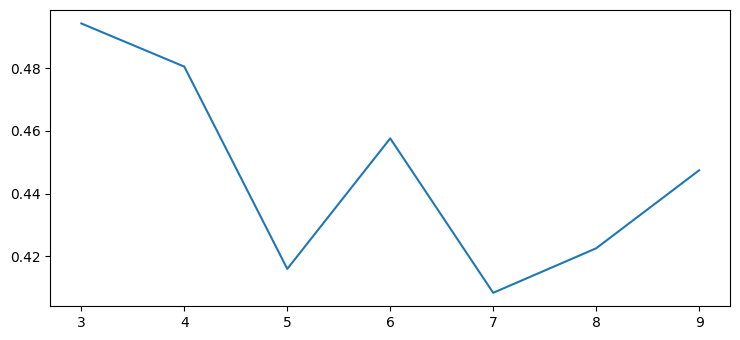

In [ ]:
results = []

for t in range(3, 10):
    lda_model = models.LdaModel(corpus, num_topics=t, id2word=dictionary, passes=15, random_state=42)
    corpus_lda = lda_model[corpus]
    cm = CoherenceModel(model=lda_model, texts=ptexts, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

s = pd.Series(results.score.values, index=results.topic.values)
_ = s.plot()

  NEG LDA MODEL

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.013*"endometriosis" + 0.013*"pain" + 0.011*"surgery" + 0.011*"get" + '
  '0.009*"endo" + 0.008*"like" + 0.007*"day" + 0.007*"time" + 0.007*"still" + '
  '0.007*"year"'),
 (1,
  '0.027*"pain" + 0.026*"period" + 0.011*"year" + 0.011*"endometriosis" + '
  '0.011*"symptom" + 0.011*"also" + 0.011*"get" + 0.009*"endo" + 0.008*"day" + '
  '0.008*"since"'),
 (2,
  '0.034*"pain" + 0.021*"like" + 0.017*"feel" + 0.010*"day" + 0.010*"symptom" '
  '+ 0.010*"get" + 0.010*"endo" + 0.008*"period" + 0.008*"back" + '
  '0.007*"dont"'),
 (3,
  '0.026*"pain" + 0.020*"feel" + 0.017*"like" + 0.013*"endo" + 0.011*"surgery" '
  '+ 0.008*"day" + 0.006*"ovary" + 0.006*"year" + 0.006*"go" + 0.006*"get"'),
 (4,
  '0.033*"pain" + 0.017*"period" + 0.016*"day" + 0.012*"like" + 0.009*"feel" + '
  '0.009*"bleeding" + 0.009*"month" + 0.008*"year" + 0.008*"back" + '
  '0.007*"endo"')]
<built-in method count of list object at 0x7f662a139a80>
[(0,
  '0.023*"pain" + 0.022*"like" + 0.016*"feel" + 0.015*"endo" + 0.

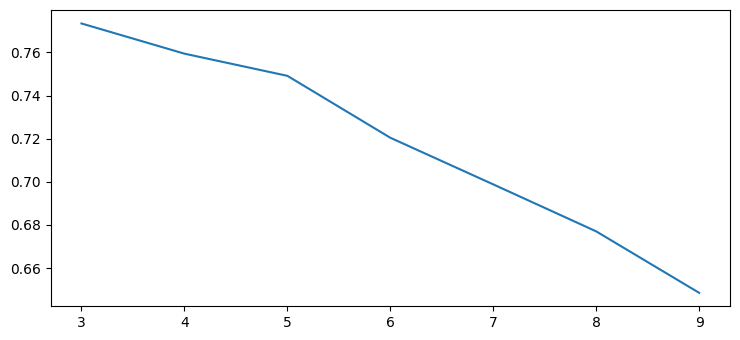

In [ ]:
# DataFrame containing the preprocessed and tokenized text
negative_posts = df[df['emotion'] == 'negative']['SelfText'].apply(lambda x: x.split()).tolist()

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(negative_posts)

# Filter out extreme values in the dictionary
dictionary.filter_extremes(no_below=5, no_above=0.8)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(post) for post in negative_posts]

# Build the LDA model
neg_lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15, random_state=42)

# Print the topics and associated words
pprint(neg_lda_model.print_topics())

topic_distribution = [max(neg_lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
print(topic_distribution.count)

# Print the topics and associated words
pprint(pos_lda_model.print_topics())
ntexts = []
for doc in corpus:
    ntexts.append([dictionary[idx] for idx, freq in doc])

results = []

for t in range(3, 10):
    lda_model = models.LdaModel(corpus, num_topics=t, id2word=dictionary, passes=15, random_state=42)
    corpus_lda = lda_model[corpus]
    cm = CoherenceModel(model=lda_model, texts=ntexts, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

s = pd.Series(results.score.values, index=results.topic.values)
_ = s.plot()

In [ ]:
# GRAPH FOR NEW NEGATIVE POSTS
neg_lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15, random_state=42)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(neg_lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.002712 -0.053592       1        1  36.980071
0     -0.052163  0.024651       2        1  35.237302
2      0.049451  0.028941       3        1  27.782627, topic_info=        Term         Freq        Total Category  logprob  loglift
22    period   629.000000   629.000000  Default  30.0000  30.0000
19      pain  1175.000000  1175.000000  Default  29.0000  29.0000
67   surgery   272.000000   272.000000  Default  28.0000  28.0000
11      feel   423.000000   423.000000  Default  27.0000  27.0000
99      like   520.000000   520.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
133    would    59.989434   221.440144   Topic3  -5.3322  -0.0252
346    still    55.657229   196.294914   Topic3  -5.4071   0.0204
32      year    70.286637   367.274149   Topic3  -5.1738  -0.3728
95        go    57.285549   225.524996   Topic3  -5.3783  -0.0896
54      know    59.061710   262.240920   Topic3  -5.3478  -0.2099

[267 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1307      2  0.866964   11th
549       1  0.812789     16
549       2  0.135465     16
549       3  0.067732     16
1150      1  0.855986     18
...     ...       ...    ...
73        2  0.623168  wrong
73        3  0.188839  wrong
32        1  0.471038   year
32        2  0.337622   year
32        3  0.190593   year

[442 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [ ]:
# DataFrame containing the preprocessed and tokenized text
fear_posts = df[df['emotion'] == 'fear']['SelfText'].apply(lambda x: x.split()).tolist()

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(fear_posts)

# Filter out extreme values in the dictionary
dictionary.filter_extremes(no_below=5, no_above=0.8)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(post) for post in fear_posts]

# Build the LDA model
fear_lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Print the topics and associated words
pprint(fear_lda_model.print_topics())

ftexts = []
for doc in corpus:
    ftexts.append([dictionary[idx] for idx, freq in doc])

topic_distribution = [max(fear_lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
print(topic_distribution.count)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.034*"pain" + 0.021*"period" + 0.020*"month" + 0.019*"endometriosis" + '
  '0.018*"day" + 0.018*"surgery" + 0.013*"2" + 0.011*"due" + 0.011*"stage" + '
  '0.011*"got"'),
 (1,
  '0.034*"pain" + 0.021*"period" + 0.017*"control" + 0.016*"birth" + '
  '0.016*"get" + 0.015*"surgery" + 0.014*"cyst" + 0.013*"dont" + 0.013*"year" '
  '+ 0.013*"day"'),
 (2,
  '0.044*"surgery" + 0.021*"week" + 0.019*"pain" + 0.016*"endo" + '
  '0.014*"anyone" + 0.011*"surgeon" + 0.011*"year" + 0.011*"lap" + '
  '0.011*"said" + 0.010*"bleeding"'),
 (3,
  '0.033*"surgery" + 0.026*"pain" + 0.026*"endo" + 0.012*"anyone" + '
  '0.012*"much" + 0.010*"uterus" + 0.010*"back" + 0.010*"ovary" + 0.009*"get" '
  '+ 0.009*"experience"'),
 (4,
  '0.036*"surgery" + 0.015*"like" + 0.014*"year" + 0.014*"pain" + 0.013*"feel" '
  '+ 0.011*"know" + 0.011*"laparoscopy" + 0.011*"want" + 0.011*"also" + '
  '0.011*"bad"')]
<built-in method count of list object at 0x79c14b6f6100>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


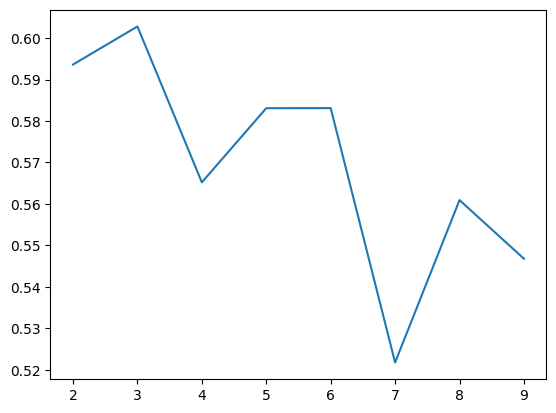

In [ ]:
results = []

for t in range(2, 10):
    lda_model = models.LdaModel(corpus, num_topics=t, id2word=dictionary, passes=15, random_state=42)
    corpus_lda = lda_model[corpus]
    cm = CoherenceModel(model=lda_model, texts=ftexts, coherence='c_v')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

s = pd.Series(results.score.values, index=results.topic.values)
_ = s.plot()

In [ ]:
fear_lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15, random_state=42)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(fear_lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.013647 -0.071183       1        1  55.886211
0     -0.080429  0.025693       2        1  23.532359
2      0.066781  0.045491       3        1  20.581429, topic_info=        Term        Freq       Total Category  logprob  loglift
60      cyst   61.000000   61.000000  Default  30.0000  30.0000
177   period  116.000000  116.000000  Default  29.0000  29.0000
98   surgery  208.000000  208.000000  Default  28.0000  28.0000
89     ovary   54.000000   54.000000  Default  27.0000  27.0000
159  control   63.000000   63.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
225     also   13.845578   61.247978   Topic3  -4.7744   0.0938
269   anyone   14.183288   73.768388   Topic3  -4.7503  -0.0681
149     back   12.289663   49.089085   Topic3  -4.8936   0.1959
84     month   13.468706   87.588372   Topic3  -4.8020  -0.2915
20       get   11.568733   89.082176   Topic3  -4.9541  -0.4605

[220 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.179837    100
0         2  0.179837    100
0         3  0.539512    100
290       1  0.923242     12
290       2  0.115405     12
...     ...       ...    ...
53        2  0.193804  would
53        3  0.246660  would
109       1  0.707911   year
109       2  0.109848   year
109       3  0.183081   year

[375 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

## **WORD2VEC**

In [ ]:
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 4;   # Minimum word count to keep a word in the vocabulary
num_workers = 4;       # Number of threads to run in parallel set to total number of cpus.
context = 3        # Context window size (on each side)
downsampling = 1e-2
tokenized_selftext = df['SelfText'].apply(word_tokenize)
word2vec_model = Word2Vec(sentences=tokenized_selftext, vector_size=num_features, window=context, min_count=min_word_count, workers=num_workers, sample=downsampling)
word2vec_model.save("word2vec_model")

In [ ]:
vocabulary_size = len(word2vec_model.wv.key_to_index)
print(f"Vocabulary Size: {vocabulary_size}")

Vocabulary Size: 2520


In [ ]:
def get_related_terms(token, topn=5):
  for word, similarity in word2vec_model.wv.most_similar(positive=[token], topn=topn):
          print(word, round(similarity, 3))
get_related_terms(u'surgery')


diagnosed 0.975
stage 0.975
excision 0.97
doctor 0.956
lap 0.952


In [ ]:
get_related_terms(u'pain')

lower 0.844
cramp 0.832
painful 0.786
heavy 0.777
back 0.766


In [ ]:
get_related_terms(u'strong')

lot 0.996
isnt 0.994
cause 0.994
rectum 0.994
cry 0.993


In [ ]:
import pandas as pd

# Assuming word2vec_model is your trained Word2Vec model
# Get vocabulary items and indices
vocab_items = list(word2vec_model.wv.key_to_index.items())

# Sort by index
vocab_items.sort(key=lambda x: x[1])

# Unpack terms and indices
ordered_terms, term_indices = zip(*vocab_items)

# Create a DataFrame with the vectors as data, and the terms as row labels
word_vectors = pd.DataFrame(word2vec_model.wv.vectors[term_indices, :], index=ordered_terms)
word_vectors.head()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
pain,-0.555595,0.303080,0.151820,1.309193,-0.183632,-0.697871,0.526241,0.915845,-0.523476,0.214317,...,0.223124,0.402987,0.332849,-0.533610,0.961779,0.525866,-0.442212,-0.582948,0.323241,0.977381
period,-0.167471,0.317013,0.187474,1.619136,-0.100761,-1.110486,0.344122,1.553211,-0.568718,-0.943787,...,0.558329,0.116053,-0.053230,-0.142522,0.433097,0.474690,0.351889,-0.627650,0.101340,0.485696
like,-0.527098,0.926526,-0.476709,0.284206,0.698593,0.313072,-0.403547,0.899510,-1.296183,0.784989,...,0.018097,0.727473,0.818632,-0.893298,1.270876,0.541442,0.458817,-0.507206,1.033307,-0.140079
endo,-0.364360,0.600748,-0.041085,-0.230742,0.080303,-0.388389,0.229726,0.850030,-0.462546,-0.336842,...,0.225477,0.227356,0.170822,0.318806,1.108446,0.149205,0.142432,-0.681469,0.082462,-0.007091
get,-0.438512,0.600042,0.140512,0.571066,-0.100372,-0.470668,0.207081,0.880460,-0.588162,-0.234748,...,0.336919,0.176779,0.168821,-0.117207,0.770398,0.258942,0.174145,-0.320307,0.079182,0.381380


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_vectors = tsne.fit_transform(word_vectors.values)
tsne_vectors = pd.DataFrame(tsne_vectors,
                            index=pd.Index(word_vectors.index),
                            columns=['x_coord', 'y_coord'])
tsne_vectors['word'] = tsne_vectors.index

In [ ]:
tsne_vectors

,x_coord,y_coord,word
pain,47.325817,13.378750,pain
period,45.402920,12.189927,period
like,60.793823,15.369099,like
endo,62.207756,1.764844,endo
get,54.263004,11.763152,get
...,...,...,...
knife,-31.809631,-27.323301,knife
unlike,-36.179768,-23.271553,unlike
band,-30.528479,-25.648746,band
drain,-41.969940,-34.364674,drain


In [ ]:

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource

# Assuming tsne_df is your DataFrame containing t-SNE vectors
plot_data = ColumnDataSource(tsne_vectors)

# create the plot and configure the title, dimensions, and tools
tsne_plot = figure(title='t-SNE Word Embeddings',

                   tools='pan, wheel_zoom, box_zoom, box_select, reset, reset',
                   active_scroll='wheel_zoom')

# add a hover tool to display words on roll-over
tsne_plot.add_tools(HoverTool(tooltips='@word'))

# draw the words as circles on the plot
tsne_plot.circle('x_coord', 'y_coord', source=plot_data,
                 color='blue', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color='black')

# configure visual elements of the plot
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# show the plot in the notebook
output_notebook()
show(tsne_plot)


<ipython-input-28-8034b91ed1ea>:8: UserWarning: ResetTool(id='p1041', ...) are being repeated
  tsne_plot = figure(title='t-SNE Word Embeddings',


KMEANS CLUSTERING


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initialize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    idx = kmeans_clustering.fit_predict(word_vectors)

    return kmeans_clustering.cluster_centers_, idx

# Assuming word2vec_model is your Word2Vec model
word_vectors_array = word2vec_model.wv.vectors  # Use 'vectors' instead of 'syn0'
num_clusters = 3

# Apply clustering function
centers, clusters = clustering_on_wordvecs(word_vectors_array, num_clusters)

# Assuming you have a model similar to tsne_df with a column 'word'
# Create a mapping of words to cluster assignments
centroid_map = dict(zip(word2vec_model.wv.index_to_key, clusters));

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.neighbors import KDTree
import pandas as pd
import numpy as np

def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs)
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers]
    closest_words_idxs = [x[1] for x in closest_points]

    closest_words = {}
    for i in range(0, len(closest_words_idxs)):
        # Adjust column names to match the actual column names in your DataFrame

        closest_words['Cluster #' + str(i).zfill(2)] = [index2word[j] for j in closest_words_idxs[i][0]]

    df = pd.DataFrame(closest_words)
    df.index = df.index + 1
    return df


In [ ]:
top_words_df = get_top_words(word2vec_model.wv.index_to_key, 700, centers, word_vectors_array)

In [ ]:
top_words_df

,Cluster #00,Cluster #01,Cluster #02
1,fact,whilst,couldnt
2,eventually,ahead,actually
3,holiday,acupuncture,little
4,hate,ab,etc
5,urine,thursday,medication
...,...,...,...
696,tablet,placed,female
697,cry,lightning,lupron
698,deep,35,checked
699,werent,colorectal,hasnt


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_cloud(cluster_num, cmap, top_words):
    words_for_cluster = top_words['Cluster #' + str(cluster_num).zfill(2)].tolist()
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap)
    wordcloud = wc.generate(' '.join(words_for_cluster))

    # Display the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.axis("off")
    plt.show()

    # Optionally, save the word cloud as an image
    # wordcloud.to_file(f'cluster_{cluster_num}.png')

# Example usage:
# display_cloud(0, 'viridis', top_words)  # Adjust parameters as needed


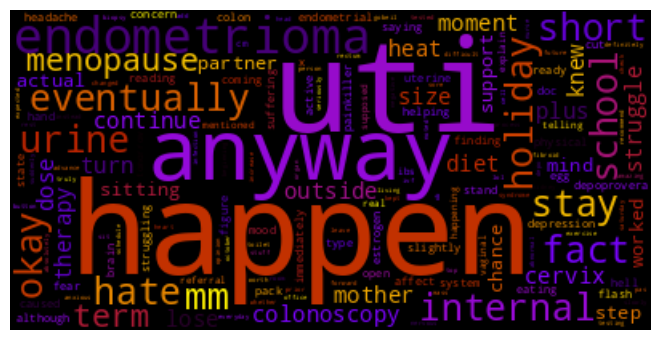

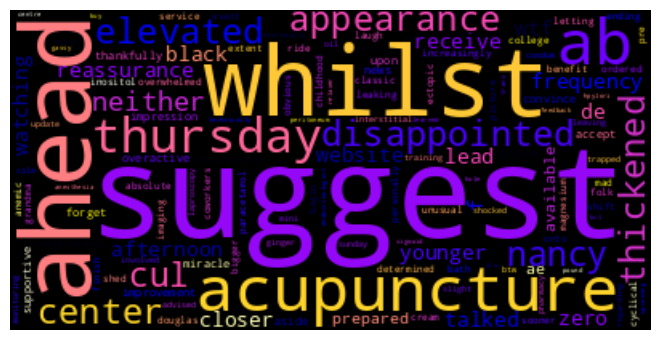

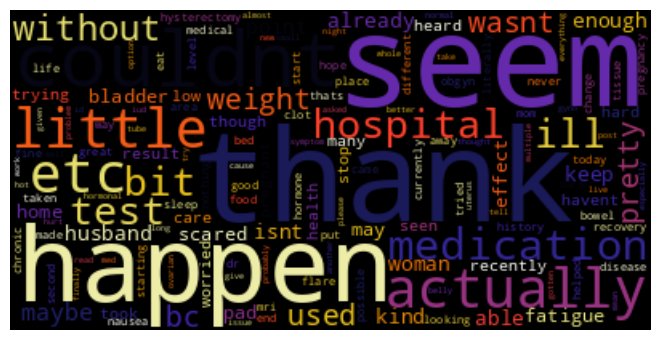

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import cycle

def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap)
    wordcloud = wc.generate(' '.join([word for word in top_words_df['Cluster #' + str(cluster_num).zfill(2)]]))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')
    plt.show()

cmaps = cycle([

    'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
    'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'
])

for i in range(3):
    col = next(cmaps)
    display_cloud(i, col)  # Use cluster number 'i' directly


